<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/NEW_DTW_EXPERIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='time HHMMSS'>

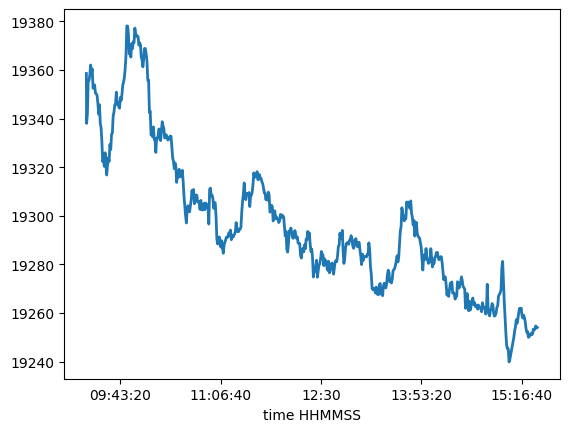

In [5]:
data['Price of Synthetic option derived future'].plot(x_compat=True,linewidth=2)

In [ ]:
pip install dtw


In [ ]:
pip install fastdtw

In [ ]:
df1=data[['Price of Synthetic option derived future']]
#print(df1.index)
df1.reset_index(inplace=True)
df1
#print(df1['time HHMMSS'])
#df1['time HHMMSS'] = pd.to_datetime(df1['time HHMMSS'], format='%H:%M:%S').dt.time
#df1['time HHMMSS'] = df1['time HHMMSS'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [ ]:
df1['time HHMMSS'] = pd.to_datetime(df1['time HHMMSS'], format='%H:%M:%S').dt.time

In [12]:
df1['time HHMMSS'] = df1['time HHMMSS'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


<ipython-input-12-a6bd95a3706a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time HHMMSS'] = df1['time HHMMSS'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [14]:
df1.set_index('time HHMMSS',inplace=True)


In [18]:
df2.set_index('time HHMMSS',inplace=True)
df3.set_index('time HHMMSS',inplace=True)


In [21]:
import  matplotlib.pyplot as plt


In [23]:
pip install dtaidistance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.8 MB/s eta 0:00:00


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

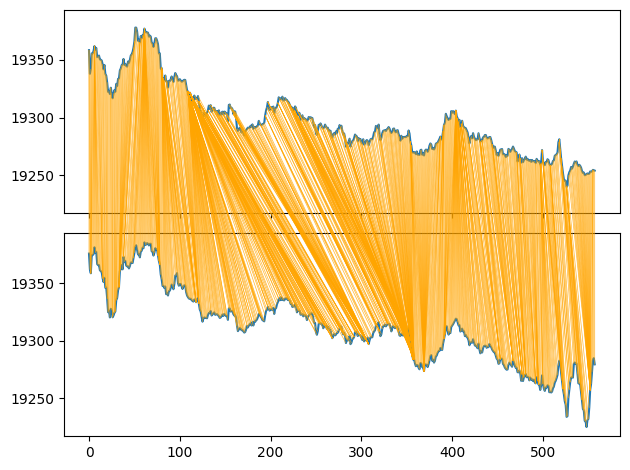

In [51]:
# DTW distance and warping path for Price of synthetic option And Spot Price.
df1=data[['Price of Synthetic option derived future']]
df2=data[['Spot price ltp NIFTY50']]
a=df1['Price of Synthetic option derived future'].values
b=df2['Spot price ltp NIFTY50'].values
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(a, b)
dtwvis.plot_warping(a, b, path)


In [26]:
d = dtw.distance_fast(a, b, use_pruning=True)
print(d)


147.74701758649886


<Axes: xlabel='time HHMMSS'>

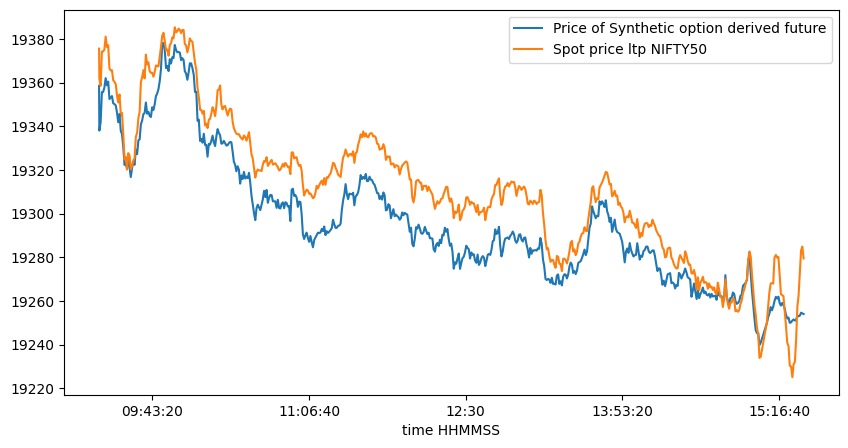

In [47]:
#Graph of synthetic Price and Spot Price.
data.loc[:,['Price of Synthetic option derived future','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


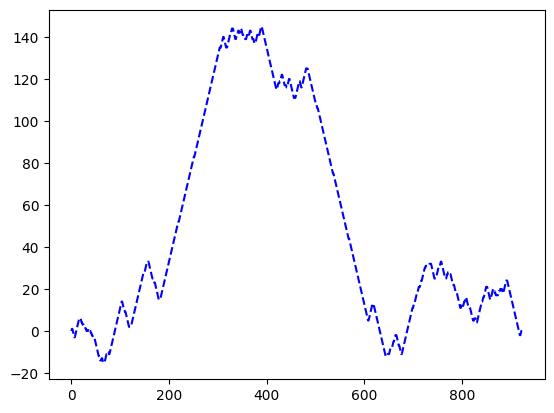

In [44]:
#Lead Lag Values of Synteic Price And Spot Price
import numpy as np
lead_lag_values2 = np.array([(point[1] - point[0]) for point in path])
plt.plot(lead_lag_values2, linestyle='dashed', color='blue', label='Lead-Lag Values')


In [ ]:
#d, paths = dtw.warping_paths(a, b, window=50, psi=2)
#best_path = dtw.best_path(paths)
#dtwvis.plot_warpingpaths(a, b, paths, best_path)

145.7335668265941


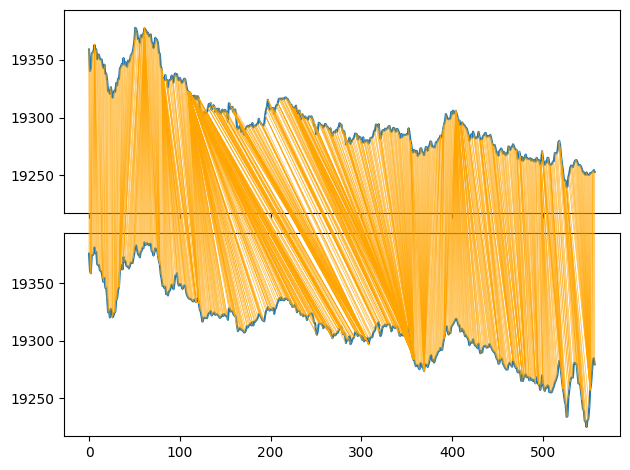

In [28]:
#DTW distance and warping path for Future price  And Spot Price.
df3=data[['price NIFTY23AUGFUT']]
c=df3['price NIFTY23AUGFUT'].values
path1 = dtw.warping_path(a, b)
dtwvis.plot_warping(c, b, path1)
d1= dtw.distance_fast(c, b, use_pruning=True)
print(d1)

<Axes: xlabel='time HHMMSS'>

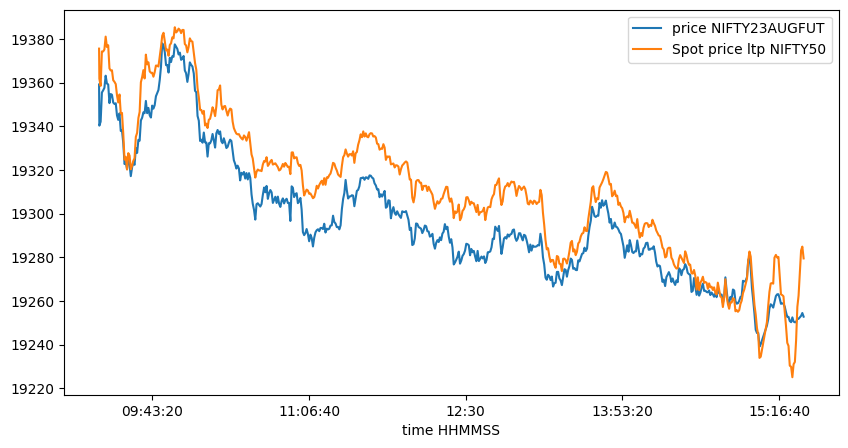

In [49]:
#Graph of Spot pRice and future price
data.loc[:,['price NIFTY23AUGFUT','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


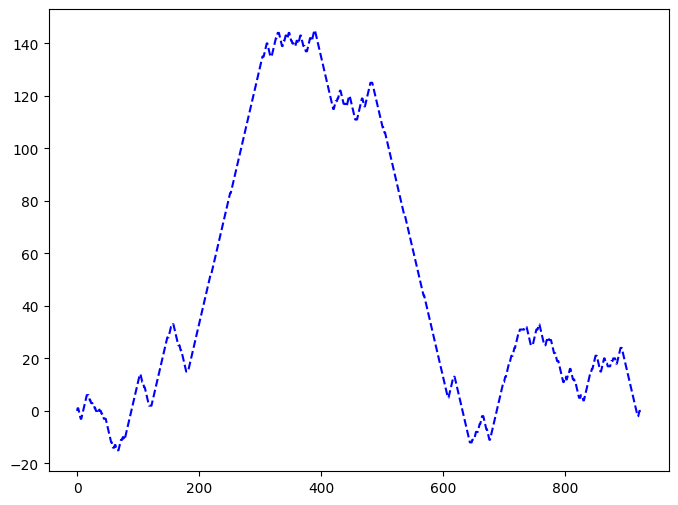

In [53]:
lead_lag_values1= np.array([(point[1] - point[0]) for point in path1])
plt.figure(figsize=(8, 6))
plt.plot(lead_lag_values1,c='blue', label='Lead-Lag Values',linestyle='dashed')